In [72]:
import numpy as np
import pandas as pd
from random import seed
from random import randrange
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [73]:
# data reading 
# uploaddata files to jupyter notebook lab otherwise have to change directory path in the code below
data = pd.read_csv('uniform.csv')
data = pd.read_csv('Two_Class_Gaussian_Data.csv')
data.to_numpy()

array([[-0.2418, -0.8484,  0.    ],
       [-1.6919,  1.0404,  0.    ],
       [-1.6919,  1.0405,  0.    ],
       ...,
       [-1.6919,  1.09  ,  1.    ],
       [-1.6919,  1.0901,  1.    ],
       [-1.6919,  1.0902,  1.    ]])

In [81]:
X = data[data.columns[0:2]]
X
Y = data[data.columns[2]]
Y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: Y, Length: 500, dtype: int64

In [76]:
#data splitting into testing and training
X_train, X_test , Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=123)
X_train.head()

,X1,X2
455,-1.6919,1.0858
384,-1.6919,1.0787
293,-1.6919,1.0696
421,-1.6919,1.0824
374,-1.6919,1.0777


In [82]:
X1=X_train.to_numpy() 
Y1=Y_train.to_numpy()
x1= X_test.to_numpy()
y1= Y_test.to_numpy()
x1.shape[1]

2

In [83]:

def predict(r, w):
    activation = w.T.dot(r)
    return 1.0 if activation >=0.0 else 0.0

def train_weights(X,Y, l_rate, n_epoch):
    w= np.zeros(X.shape[1]+1)
    for epoch in range (n_epoch):
        for r in range(X.shape[0]) :
            x=np.insert(X[r],0,1)
            pred= predict(x, w)
            err=Y[r]-pred
            w= w + l_rate* err * x
        print('>epoch=%d, lrate=%.3f ' % (epoch, l_rate) )
    return w



In [84]:


l_rate = 0.1
n_epoch = 100
weights = train_weights(X1,Y1, l_rate, n_epoch)
print(weights)






>epoch=0, lrate=0.100 
>epoch=1, lrate=0.100 
>epoch=2, lrate=0.100 
>epoch=3, lrate=0.100 
>epoch=4, lrate=0.100 
>epoch=5, lrate=0.100 
>epoch=6, lrate=0.100 
>epoch=7, lrate=0.100 
>epoch=8, lrate=0.100 
>epoch=9, lrate=0.100 
>epoch=10, lrate=0.100 
>epoch=11, lrate=0.100 
>epoch=12, lrate=0.100 
>epoch=13, lrate=0.100 
>epoch=14, lrate=0.100 
>epoch=15, lrate=0.100 
>epoch=16, lrate=0.100 
>epoch=17, lrate=0.100 
>epoch=18, lrate=0.100 
>epoch=19, lrate=0.100 
>epoch=20, lrate=0.100 
>epoch=21, lrate=0.100 
>epoch=22, lrate=0.100 
>epoch=23, lrate=0.100 
>epoch=24, lrate=0.100 
>epoch=25, lrate=0.100 
>epoch=26, lrate=0.100 
>epoch=27, lrate=0.100 
>epoch=28, lrate=0.100 
>epoch=29, lrate=0.100 
>epoch=30, lrate=0.100 
>epoch=31, lrate=0.100 
>epoch=32, lrate=0.100 
>epoch=33, lrate=0.100 
>epoch=34, lrate=0.100 
>epoch=35, lrate=0.100 
>epoch=36, lrate=0.100 
>epoch=37, lrate=0.100 
>epoch=38, lrate=0.100 
>epoch=39, lrate=0.100 
>epoch=40, lrate=0.100 
>epoch=41, lrate=0.100 
>e

In [88]:
    def acc( test):
        ps = list()
        w= weights
        for i in range(test.shape[0]):
            t = np.insert(test[i],0,1)
            p = predict(t,w)
            ps.append(p)
        return(ps)
    predictions=acc(x1)
    def accuracy(actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                corr += 1
        return corr / float(len(actual)) * 100.0
    accuracy(y1, predictions)

99.2

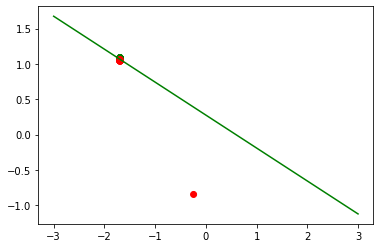

In [102]:
W0=weights[1]
W1=weights[2]
bi =weights[0]
colormap = np.array(['r', 'g'])

plt.scatter(x1[ : ,0], x1[ :,1] , c=colormap[y1])
x=np.linspace(-3, 3,10)
Y=(-(bi/W1)/(bi/W0))*x +(-bi/W1)
plt.plot(x,Y,'-g')
